<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://raw.githubusercontent.com/Unidata/MetPy/master/src/metpy/plots/_static/unidata_150x150.png" alt="Unidata Logo" style="height: 98px;">
</div>

<h1>Matplotlib Basics</h1>
<h3>Unidata Python Workshop</h3>

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

<div style="float:right; width:250 px"><img src="https://matplotlib.org/_static/logo2.png" alt="NumPy Logo" style="height: 150px;"></div>

### Questions
1. How are line plots created using Matplotlib?
1. What methods exist to customize the look of these plots?

### Objectives
1. Create a basic line plot.
1. Add labels and grid lines to the plot.
1. Plot multiple series of data.
1. Plot imshow, contour, and filled contour plots.

## Plotting with Matplotlib

Matplotlib is a python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

The first step is to set up our notebook environment so that matplotlib plots appear inline as images:

In [16]:
%matplotlib inline

Next we import the matplotlib library's `pyplot` interface; this interface is the simplest way to create new Matplotlib figures. To shorten this long name, we import it as `plt` to keep things short but clear.

In [17]:
import matplotlib.pyplot as plt
import numpy as np

Now we generate some data to use while experimenting with plotting:

In [18]:
times = np.array([ 93.,  96.,  99., 102., 105., 108., 111., 114., 117.,
                  120., 123., 126., 129., 132., 135., 138., 141., 144.,
                  147., 150., 153., 156., 159., 162.])
temps = np.array([310.7, 308.0, 296.4, 289.5, 288.5, 287.1, 301.1, 308.3,
                  311.5, 305.1, 295.6, 292.4, 290.4, 289.1, 299.4, 307.9,
                  316.6, 293.9, 291.2, 289.8, 287.1, 285.8, 303.3, 310.])

Now we come to two quick lines to create a plot. Matplotlib has two core objects: the `Figure` and the `Axes`. The `Axes` is an individual plot with an x-axis, a y-axis, labels, etc; it has all of the various plotting methods we use. A `Figure` holds one or more `Axes` on which we draw; think of the `Figure` as the level at which things are saved to files (e.g. PNG, SVG)

![anatomy of a figure](anatomy-of-a-figure.png)

Below the first line asks for a `Figure` 10 inches by 6 inches. We then ask for an `Axes` or subplot on the `Figure`. After that, we call `plot`, with `times` as the data along the x-axis (independant values) and `temps` as the data along the y-axis (the dependant values).

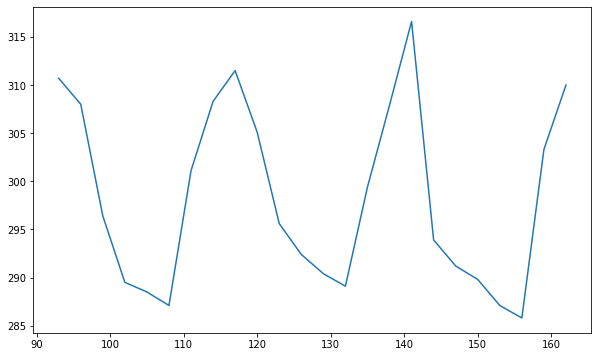

In [19]:
# Create a figure
fig = plt.figure(figsize=(10, 6))

# Ask, out of a 1x1 grid, the first axes.
ax = fig.add_subplot(1, 1, 1)

# Plot times as x-variable and temperatures as y-variable
ax.plot(times, temps)

From there, we can do things like ask the axis to add labels for x and y:

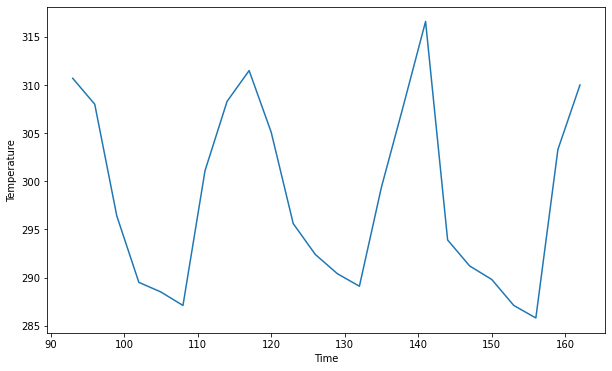

In [20]:
# Add some labels to the plot
ax.set_xlabel('Time')
ax.set_ylabel('Temperature')

# Prompt the notebook to re-display the figure after we modify it
fig

We can also add a title to the plot:

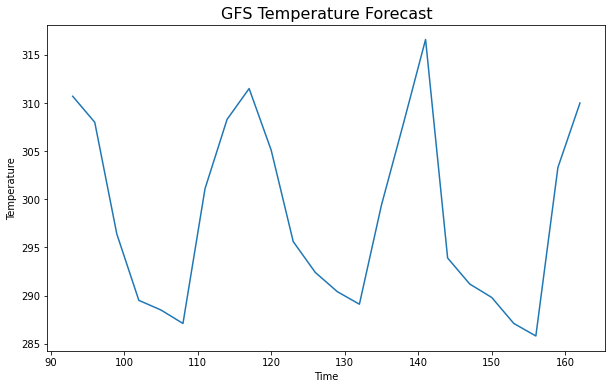

In [21]:
ax.set_title('GFS Temperature Forecast', fontdict={'size':16})

fig

Of course, we can do so much more...

In [22]:
# Set up more temperature data
temps_1000 = np.array([316.0, 316.3, 308.9, 304.0, 302.0, 300.8, 306.2, 309.8,
                       313.5, 313.3, 308.3, 304.9, 301.0, 299.2, 302.6, 309.0,
                       311.8, 304.7, 304.6, 301.8, 300.6, 299.9, 306.3, 311.3])

Here we call `plot` more than once to plot multiple series of temperature on the same plot; when plotting we pass `label` to `plot` to facilitate automatic creation. This is added with the `legend` call. We also add gridlines to the plot using the `grid()` call.

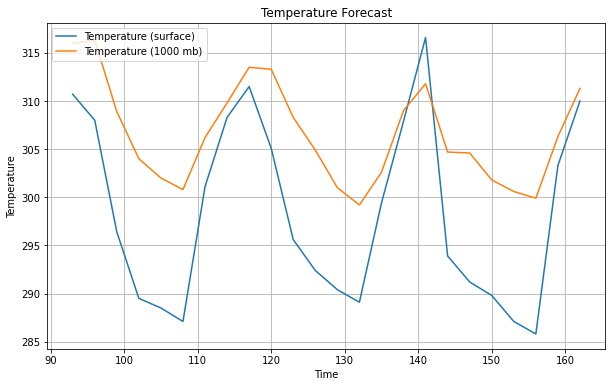

In [23]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

# Plot two series of data
# The label argument is used when generating a legend.
ax.plot(times, temps, label='Temperature (surface)')
ax.plot(times, temps_1000, label='Temperature (1000 mb)')

# Add labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
ax.set_title('Temperature Forecast')

# Add gridlines
ax.grid(True)

# Add a legend to the upper left corner of the plot
ax.legend(loc='upper left')

We're not restricted to the default look of the plots, but rather we can override style attributes, such as `linestyle` and `color`. `color` can accept a wide array of options for color, such as `red` or `blue` or HTML color codes. Here we use some different shades of red taken from the Tableau color set in matplotlib, by using `tab:red` for color.

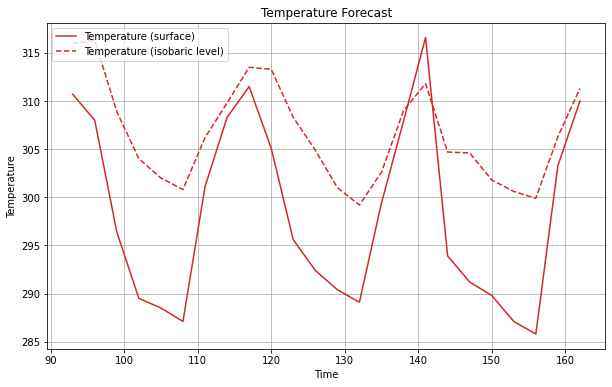

In [24]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

# Specify how our lines should look
ax.plot(times, temps, color='tab:red', label='Temperature (surface)')
ax.plot(times, temps_1000, color='tab:red', linestyle='--',
        label='Temperature (isobaric level)')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
ax.set_title('Temperature Forecast')
ax.grid(True)
ax.legend(loc='upper left')

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
         <li>Use add_subplot to create two different subplots on the figure.</li>
         <li>Create one subplot for temperature, and one for dewpoint.</li>
         <li>Set the title of each subplot as appropriate.</li>
         <li>Use ax.set_xlim and ax.set_ylim to control the plot boundaries.</li>
         <li><b>BONUS:</b> Experiment with passing sharex and sharey to add_subplot to <a href="https://matplotlib.org/gallery/subplots_axes_and_figures/shared_axis_demo.html#sphx-glr-gallery-subplots-axes-and-figures-shared-axis-demo-py">share plot limits</a></li>
    </ul>
</div>

(90.0, 165.0)

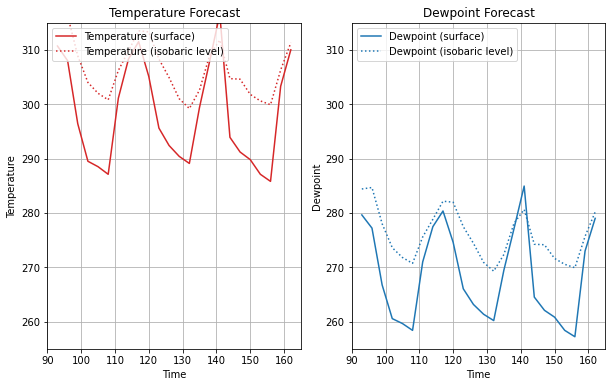

In [36]:
# Fake dewpoint data to plot
dewpoint = 0.9 * temps
dewpoint_1000 = 0.9 * temps_1000

# Create the figure
fig = plt.figure(figsize=(10, 6))

# YOUR CODE GOES HERE
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2,sharex=ax1, sharey=ax1)

# Specify how our lines should look
ax1.plot(times, temps, color='tab:red', label='Temperature (surface)')
ax1.plot(times, temps_1000, color='tab:red', linestyle=':',
        label='Temperature (isobaric level)')

# Same as above
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature')
ax1.set_title('Temperature Forecast')
ax1.grid(True)
ax1.legend(loc='upper left')

ax2.plot(times, dewpoint, color='tab:blue', label='Dewpoint (surface)')
ax2.plot(times, dewpoint_1000, color='tab:blue', linestyle=':',
         label='Dewpoint (isobaric level)')

ax2.set_xlabel('Time')
ax2.set_ylabel('Dewpoint')
ax2.set_title('Dewpoint Forecast')
ax2.grid(True)
ax2.legend(loc='upper left')
ax2.set_ylim(255, 315)
ax2.set_xlim(90, 165)


<div class="alert alert-info">
    <b>SOLUTION</b>
</div>

(95.0, 162.0)

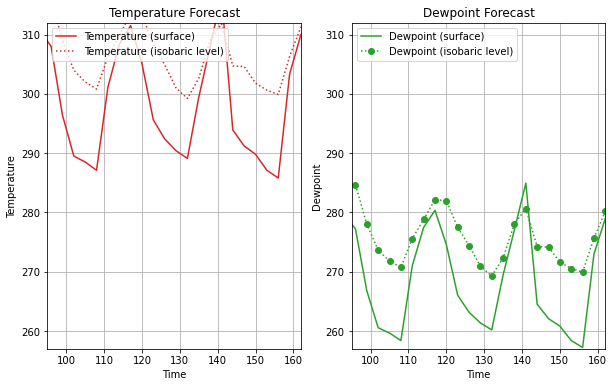

In [26]:
# %load solutions/subplots.py
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 2, 1)

# Specify how our lines should look
ax.plot(times, temps, color='tab:red', label='Temperature (surface)')
ax.plot(times, temps_1000, color='tab:red', linestyle=':',
        label='Temperature (isobaric level)')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
ax.set_title('Temperature Forecast')
ax.grid(True)
ax.legend(loc='upper left')

ax2 = fig.add_subplot(1, 2, 2, sharex=ax, sharey=ax)
ax2.plot(times, dewpoint, color='tab:green', label='Dewpoint (surface)')
ax2.plot(times, dewpoint_1000, color='tab:green', linestyle=':', marker='o',
         label='Dewpoint (isobaric level)')

ax2.set_xlabel('Time')
ax2.set_ylabel('Dewpoint')
ax2.set_title('Dewpoint Forecast')
ax2.grid(True)
ax2.legend(loc='upper left')
ax2.set_ylim(257, 312)
ax2.set_xlim(95, 162)


## Scatter Plots
Maybe it doesn't make sense to plot your data as a line plot, but with markers (a scatter plot). We can do this by setting the `linestyle` to none and specifying a marker type, size, color, etc.

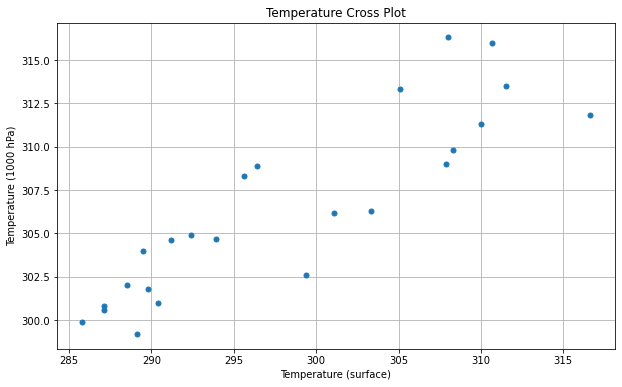

In [37]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

# Specify no line with circle markers
ax.plot(temps, temps_1000, linestyle='None', marker='o', markersize=5)

ax.set_xlabel('Temperature (surface)')
ax.set_ylabel('Temperature (1000 hPa)')
ax.set_title('Temperature Cross Plot')
ax.grid(True)

You can also use the `scatter` methods, which is slower, but will give you more control, such as being able to color the points individually based upon a third variable.

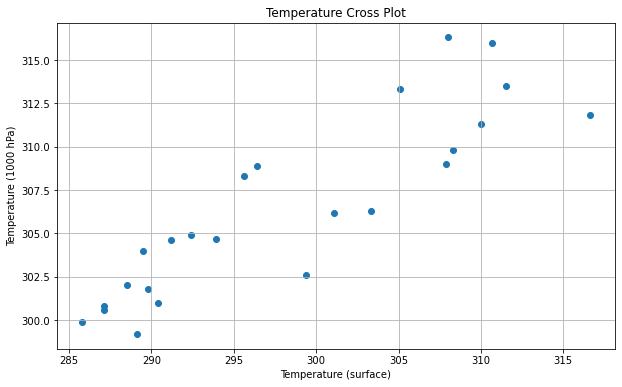

In [38]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

# Specify no line with circle markers
ax.scatter(temps, temps_1000)

ax.set_xlabel('Temperature (surface)')
ax.set_ylabel('Temperature (1000 hPa)')
ax.set_title('Temperature Cross Plot')
ax.grid(True)

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
         <li>Beginning with our code above, add the `c` keyword argument to the `scatter` call and color the points by the difference between the surface and 1000 hPa temperature.</li>
         <li>Add a 1:1 line to the plot (slope of 1, intercept of zero). Use a black dashed line.</li>
         <li><b>BONUS:</b> Change the color map to be something more appropriate for this plot.</li>
         <li><b>BONUS:</b> Try to add a colorbar to the plot (have a look at the matplotlib documentation for help).</li>
    </ul>
</div>

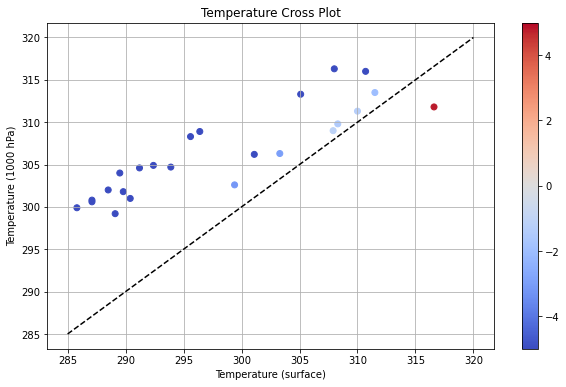

In [50]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

# YOUR CODE GOES HERE

ax.plot([285, 320], [285, 320], color='black', linestyle='--')
s = ax.scatter(temps, temps_1000, c= temps - temps_1000,cmap='coolwarm', vmin=-5, vmax=5)
fig.colorbar(s)

ax.set_xlabel('Temperature (surface)')
ax.set_ylabel('Temperature (1000 hPa)')
ax.set_title('Temperature Cross Plot')
ax.grid(True)

<div class="alert alert-info">
    <b>SOLUTION</b>
</div>

In [39]:
# %load solutions/color_scatter.py
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot([285, 320], [285, 320], color='black', linestyle='--')
s = ax.scatter(temps, temps_1000, c= temps - temps_1000, cmap='bwr', vmin=-5, vmax=5)
fig.colorbar(s)

ax.set_xlabel('Temperature (surface)')
ax.set_ylabel('Temperature (1000 hPa)')
ax.set_title('Temperature Cross Plot')
ax.grid(True)


## imshow/contour
- `imshow` displays the values in an array as colored pixels, similar to a heat map.
- `contour` creates contours around data.
- `contourf` creates filled contours around data.

First let's create some fake data to work with - let's use a bivariate normal distribution.

In [52]:
x = y = np.arange(-3.0, 3.0, 0.025)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

Let's start with a simple imshow plot.

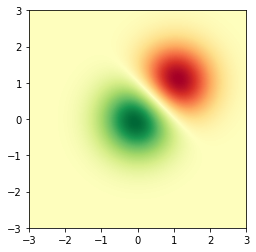

In [53]:
fig, ax = plt.subplots()
im = ax.imshow(Z, interpolation='bilinear', cmap='RdYlGn',
               origin='lower', extent=[-3, 3, -3, 3])

We can also create contours around the data.

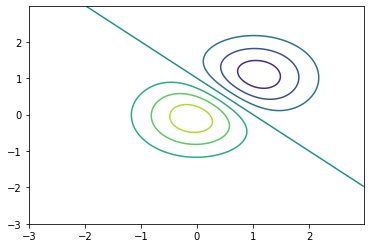

In [54]:
fig, ax = plt.subplots()
ax.contour(X, Y, Z)

<a list of 13 text.Text objects>

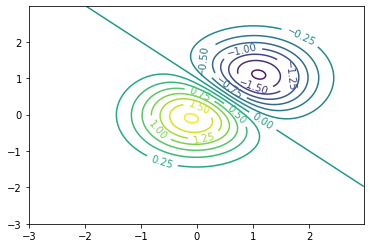

In [57]:
fig, ax = plt.subplots()
c = ax.contour(X, Y, Z,levels=np.arange(-2, 2, 0.25))
ax.clabel(c)

In [ ]:
fig, ax = plt.subplots()
c = ax.contourf(X, Y, Z)

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
         <li>Create a figure using imshow and contour that is a heatmap in the colormap of your choice. Overlay black contours with a 0.5 contour interval.</li>
    </ul>
</div>


<a list of 7 text.Text objects>

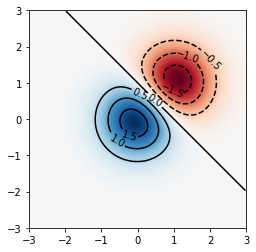

In [61]:
# YOUR CODE GOES HERE
fig, ax = plt.subplots()
im = ax.imshow(Z, interpolation='bilinear', cmap='RdBu',origin='lower', extent=[-3, 3, -3, 3])
c = ax.contour(X, Y, Z, levels=np.arange(-2, 2, 0.5), colors='black')
ax.clabel(c)

<div class="alert alert-info">
    <b>SOLUTION</b>
</div>

In [58]:
# %load solutions/imshow_contour.py
fig, ax = plt.subplots()
im = ax.imshow(Z, interpolation='bilinear', cmap='PiYG',
               origin='lower', extent=[-3, 3, -3, 3])
c = ax.contour(X, Y, Z, levels=np.arange(-2, 2, 0.5), colors='black')
ax.clabel(c)


## Resources

The goal of this tutorial is to provide an overview of the use of the Matplotlib library. It covers creating simple line plots, but it is by no means comprehensive. For more information, try looking at the:
- [Matplotlib Documentation](http://matplotlib.org)
- [Matplotlib `plot` documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)